In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
police_killings = pd.read_csv('police_killings.csv', encoding = 'ISO-8859-1')

In [3]:
# make an easier reference (DQ required police_killings)

df = police_killings

In [4]:
# also DQ requirement

print(df.columns)

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')


In [5]:
# police killings by race

df['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

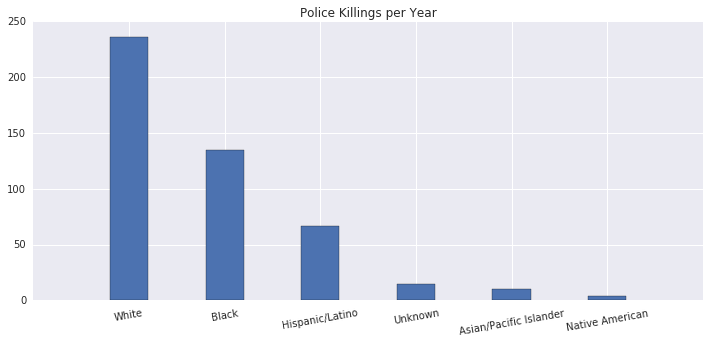

In [6]:
# create bar chart of police killings per year by race

fig, ax, = plt.subplots(figsize = (12, 5))

# create lists for bar chart
race_list = df['raceethnicity'].value_counts().index.tolist()
race_kill_count = df['raceethnicity'].value_counts().values.tolist()

ax.bar(np.arange(len(race_list)), race_kill_count, 0.4, align = 'center')
ax.set_title('Police Killings per Year')

# create x labels
plt.xticks(np.arange(len(race_list)), race_list)

# rotate x labels due to overlap
plt.setp(ax.get_xticklabels(), rotation = 10)

plt.show()

In [7]:
# create dict with population per race (importing csv doesn't work on web app)

race_pop = {'White': 196817552,
            'Hispanic/Latino': 50477594,
            'Black': 37685848,
            'Asian/Pacific Islander': 14946700,
            'Unknown': 6570746,
            'Native American': 2247098
            }

# convert to series
race_pop = pd.Series(race_pop)

In [8]:
# convert to df
race_pop_df = race_pop.to_frame()

# rename population column
race_pop_df.columns = ['population']

# convert the previous value_count of police killings by race to df
race_death_df = df['raceethnicity'].value_counts().to_frame()

In [9]:
# concatenate the two dataframes so that deaths per capita can be calculated

race_pop_death_df = pd.concat([race_pop_df, race_death_df],
                              axis = 1,
                              join = 'inner')

In [10]:
# calculate deaths per capita

race_pop_death_df['deaths_per_capita'] = race_pop_death_df['raceethnicity'] / race_pop_death_df['population']

In [11]:
race_pop_death_df

,population,raceethnicity,deaths_per_capita
White,196817552,236,1.199080e-06
Black,37685848,135,3.582247e-06
Hispanic/Latino,50477594,67,1.327322e-06
Unknown,6570746,15,2.282846e-06
Asian/Pacific Islander,14946700,10,6.690440e-07
Native American,2247098,4,1.780074e-06


In [12]:
# sort the df so that it displays as such on the bar chart

race_pop_death_df.sort_values('deaths_per_capita',
                              inplace = True,
                              ascending = False)

In [13]:
# create lists for the bar chart (for whatever reason,
# whenever I tried using another data format it wasn't working)

race_list = race_pop_death_df.index.tolist()
race_kill_capita_list = race_pop_death_df['deaths_per_capita'].tolist()

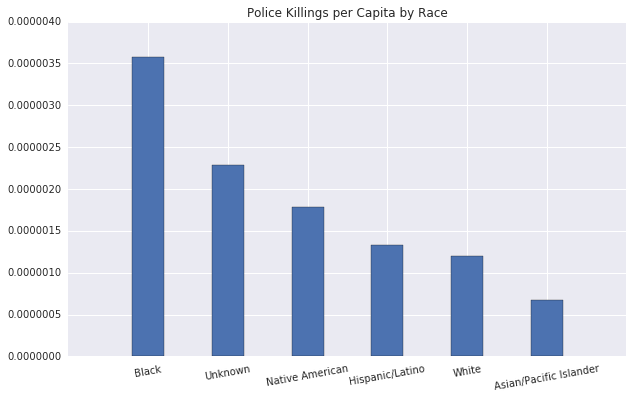

In [14]:
# create bar chart for police killings per capita by race

fig, ax = plt.subplots(figsize = (10, 6))

ax.bar(np.arange(len(race_list)),
       race_kill_capita_list,
       0.4,
       align = 'center')

ax.set_title('Police Killings per Capita by Race')

# create x labels
plt.xticks(np.arange(len(race_list)), race_list)

# rotate x labels due to overlap
plt.setp(ax.get_xticklabels(), rotation = 10)

plt.show()

In [15]:
income = df['p_income']

In [16]:
income = income.apply(lambda x: 0 if x == '-' else x).astype(int)

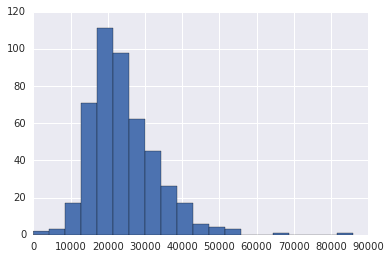

In [17]:
income.hist(bins = 20)

In [18]:
p_income_pop = {'Under 25k': 97494000,
                '25,000 to 50,000': 62034000,
                '50,000 to 75,000': 31878000,
                '75,000 to 100,000': 14875000,
                '100k or More': 20755000}

In [19]:
pop_income_df = pd.Series(p_income_pop).to_frame()

In [20]:
income_list = income.values.tolist()

In [21]:
def income_brackets(income_list):
    
    # create blank income bracket dict
    income_dict = {'Under 25k': 0,
                '25,000 to 50,000': 0,
                '50,000 to 75,000': 0,
                '75,000 to 100,000': 0,
                '100k or More': 0}
    
    # loop through list and add to dict
    for item in income_list:
        if item < 25000:
            income_dict['Under 25k'] += 1
        if item >= 25000 and item < 50000:
            income_dict['25,000 to 50,000'] += 1
        if item >= 50000 and item < 75000:
            income_dict['50,000 to 75,000'] += 1
        if item >= 75000 and item < 100000:
            income_dict['75,000 to 100,000'] += 1
        if item >= 100000:
            income_dict['100k or More'] += 1
    
    # convert to Series
    income_df = pd.Series(income_dict).to_frame()
    
    # return dict
    return income_df

In [22]:
kill_income_df = income_brackets(income_list)

In [23]:
kill_income_df.columns = ['count']
pop_income_df.columns = ['count']

In [24]:
# create norm column for killings
kill_income_df['norm_count_kill'] = kill_income_df['count'] / kill_income_df['count'].sum()

# create norm column for population
pop_income_df['norm_count_pop'] = pop_income_df['count'] / pop_income_df['count'].sum()

In [25]:
norm_income_df = pd.concat([kill_income_df, pop_income_df],
                           axis = 1,
                           join = 'inner')

In [26]:
norm_income_df = norm_income_df[['norm_count_kill', 'norm_count_pop']]

In [27]:
norm_income_df

,norm_count_kill,norm_count_pop
100k or More,0.000000,0.091417
"25,000 to 50,000",0.372591,0.273234
"50,000 to 75,000",0.012848,0.140409
"75,000 to 100,000",0.002141,0.065518
Under 25k,0.612420,0.429421


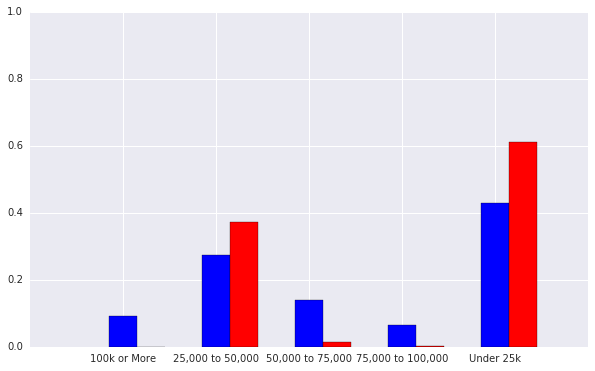

In [28]:
# create lists for plotting
income_list = norm_income_df.index.tolist()
norm_count_kill_list = norm_income_df['norm_count_kill'].tolist()
norm_count_pop_list = norm_income_df['norm_count_pop'].tolist()

# create fig, ax
fig, ax = plt.subplots(figsize = (10, 6))

# plot population personal income
ax.bar(np.arange(len(income_list)),
       norm_count_pop_list,
       0.3,
       align = 'center',
       color = 'blue')

# plot killings personal income
ax.bar(np.arange(len(income_list)) + 0.3,
       norm_count_kill_list,
       0.3,
       align = 'center',
       color = 'red')

# set limit
ax.set_ylim(0, 1)

plt.xticks(np.arange(len(income_list)), income_list)
#ax2.xticks(np.arange(len(income_list)), income_list)

plt.show()

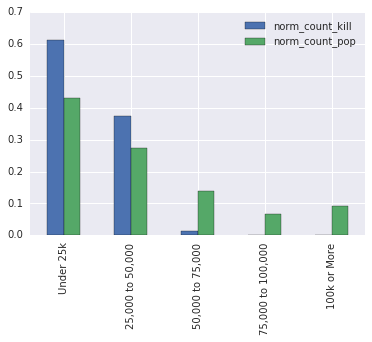

In [29]:
# order the incomes (current list is alphabetical)
ordered_income_list = ['Under 25k',
               '25,000 to 50,000',
               '50,000 to 75,000',
               '75,000 to 100,000',
               '100k or More']

# plot bar chart (using pandas plotting method)
norm_income_df.ix[ordered_income_list].plot(kind = 'bar')

plt.show()

In [30]:
norm_income_df['difference'] = norm_income_df['norm_count_kill'] - norm_income_df['norm_count_pop']

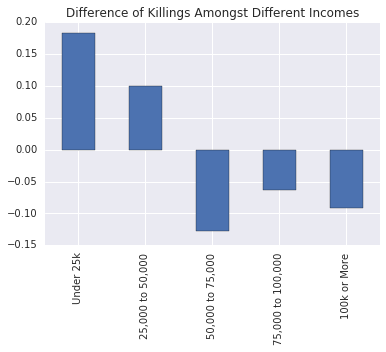

In [31]:
norm_income_df['difference'].ix[ordered_income_list].plot(kind = 'bar', title = 'Difference of Killings Amongst Different Incomes')

plt.show()

In [32]:
state_pop = pd.read_csv('state_population.csv')

In [33]:
# assign state (index) and killings (values) to series
counts = police_killings['state_fp'].value_counts()

In [34]:
states = pd.DataFrame({'STATE': counts.index, 'shootings': counts})

In [35]:
states = state_pop.merge(states, on = 'STATE')

In [36]:
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000

In [37]:
states['rate'] = states['shootings'] / states['pop_millions']

In [38]:
# top ten states (ordered by highest police killings per capita)
states.sort_values(by = 'rate', ascending = False, inplace = True)

In [39]:
most_kills = states[:10]['STATE'].values.tolist()
least_kills = states[-10:]['STATE'].values.tolist()

In [40]:
high_kill_state_df = police_killings[police_killings['state_fp'].isin(most_kills)]
low_kill_state_df = police_killings[police_killings['state_fp'].isin(least_kills)]

In [41]:
high_kill_state_df.describe()

/dataquest/system/env/python3/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,92.000000,93.000000,92.000000,84.000000,92.000000,92.000000,92.000000
mean,15.677419,2015.0,35.631142,-105.733698,19.645161,46.139785,245194.462366,1.969155e+10,19691.301075,4269.344086,43327.152174,48702.172043,0.899455,2.476190,2.260870,0.102894,0.222367
std,8.992946,0.0,5.938627,15.626754,14.678915,41.976337,367943.438851,1.470474e+10,14704.718133,2100.699519,17537.586163,9785.696088,0.334014,1.366344,1.175478,0.060407,0.141249
min,1.000000,2015.0,19.915194,-159.642700,2.000000,1.000000,100.000000,2.020001e+09,2020.000000,0.000000,15293.000000,25498.000000,0.330230,1.000000,1.000000,0.011335,0.035051
25%,7.000000,2015.0,33.326981,-111.800605,4.000000,13.000000,2500.000000,4.021002e+09,4021.000000,2868.000000,NaN,42987.000000,NaN,NaN,NaN,NaN,NaN
50%,16.000000,2015.0,35.204090,-104.909360,16.000000,27.000000,21903.000000,1.602702e+10,16027.000000,4232.000000,NaN,48801.000000,NaN,NaN,NaN,NaN,NaN
75%,24.000000,2015.0,38.446102,-95.992844,35.000000,71.000000,388200.000000,3.502796e+10,35027.000000,5375.000000,NaN,53596.000000,NaN,NaN,NaN,NaN,NaN
max,30.000000,2015.0,61.218408,-75.456352,40.000000,143.000000,980000.000000,4.014301e+10,40143.000000,13561.000000,111464.000000,77454.000000,2.308703,5.000000,5.000000,0.324444,0.824971


In [42]:
pk = df[df.share_white != '-']
pk = pk[pk.share_black != '-']
pk = pk[pk.share_hispanic != '-']

In [52]:
pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)

In [56]:
cols_to_compare = ['state_fp',
                   'pop',
                   'county_income',
                   'share_white',
                   'share_black',
                   'share_hispanic']

In [62]:
pk_high_kill = pk[pk['state_fp'].isin(most_kills)][cols_to_compare]
pk_low_kill = pk[pk['state_fp'].isin(least_kills)][cols_to_compare]

In [63]:
pk_high_kill.describe()

,state_fp,pop,county_income,share_white,share_black,share_hispanic
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,19.619565,4315.750000,48706.967391,55.652174,11.532609,20.693478
std,14.757261,2063.723609,9839.206872,24.406158,19.591303,20.415690
min,2.000000,403.000000,25498.000000,2.100000,0.000000,0.000000
25%,4.000000,2886.000000,42987.000000,39.175000,0.675000,4.350000
50%,16.000000,4257.500000,48801.000000,58.200000,2.700000,10.850000
75%,35.000000,5377.000000,53596.000000,74.200000,11.550000,31.725000
max,40.000000,13561.000000,77454.000000,95.900000,93.100000,81.500000


In [64]:
pk_low_kill.describe()

,state_fp,pop,county_income,share_white,share_black,share_hispanic
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,32.781818,4153.472727,55037.963636,60.132727,21.610909,12.994545
std,11.886330,1395.466029,12468.570173,32.653614,27.898976,15.433434
min,9.000000,1271.000000,34388.000000,0.000000,0.000000,0.000000
25%,21.000000,3236.500000,46578.500000,38.900000,2.150000,1.800000
50%,36.000000,4079.000000,53119.000000,72.100000,9.300000,5.900000
75%,39.000000,4923.500000,59206.000000,88.300000,27.450000,20.350000
max,55.000000,8222.000000,87763.000000,97.200000,98.900000,71.900000
